Portland Data Group Applied Project
=================

In [780]:
#Let's go ahead and start with some imports
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import datetime
import scipy.stats
#from paretochart import pareto


import seaborn as sns
sns.set_style('whitegrid')#give a nice white grid background for visualizations

# remove warnings
import warnings
warnings.filterwarnings('ignore')

In [781]:
# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')#give a nice white grid background for visualizations
%matplotlib inline

Simple and Specific Questions

    Objective 1: Pick a simple question 


Group Participants: 

    Sonny Nallamilli, 
    Robert Lugg, 
    John Burt, 
    Privasha Chatterjee, 
    Manish Saraf

In [782]:
stock_data=pd.read_csv('C://Users/pmlef/Documents/python_work/Python_for_Data_Analysis/stocks-us-adjClose.csv',parse_dates=True,dayfirst=True,na_values=".")

In [783]:
#stock_data.info()
#stock_data.shape
#stock_data.describe()
#stock_data.columns
#stock_data.index

In [784]:
stock_data.rename(columns={'compiled from Yahoo! Finance data by Matt Borthwick': 'Date'},inplace=True)

In [785]:
stock_data.head()

,Date,ED,DD,CVX,FL,CAT,IP,SJW,F,LLY,...,EXTN,VYGR,ACG,MIME,TCRZ,MCX,EDIT,LMHA,UA,BTU
0,1970-01-02,0.307997,0.000480,0.582503,1.857836,1.475225,1.808415,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1970-01-05,0.320831,0.000481,0.585290,1.839623,1.470783,1.873423,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1970-01-06,0.316553,0.000477,0.576929,1.845694,1.435234,1.855694,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1970-01-07,0.312275,0.000475,0.575535,1.809266,1.390800,1.814324,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1970-01-08,0.312275,0.000469,0.586683,1.821408,1.395244,1.832054,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


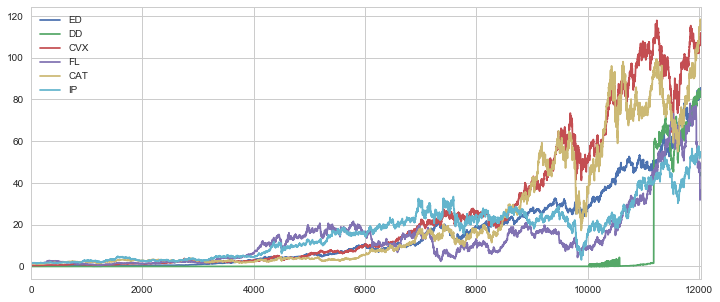

In [786]:
stock_data['ED'].plot(legend=True,figsize=(12,5))
stock_data['DD'].plot(legend=True,figsize=(12,5))
stock_data['CVX'].plot(legend=True,figsize=(12,5))
stock_data['FL'].plot(legend=True,figsize=(12,5))
stock_data['CAT'].plot(legend=True,figsize=(12,5))
stock_data['IP'].plot(legend=True,figsize=(12,5))

In [787]:
#stock_data.head()

In [788]:
stock_data['Date'] = pd.to_datetime(stock_data['Date'], format = '%Y-%m-%d',  errors='coerce')

In [789]:
#allstocks_mean = stock_data.mean(axis=1)
#allstocks_sum = stock_data.sum(axis=1)

Create Useful Variables

In [636]:
stock_data['year'], stock_data['month'], stock_data['day'], stock_data['day_name'], stock_data['decade'], stock_data['quarter']=  stock_data['Date'].dt.year, stock_data['Date'].dt.month, stock_data['Date'].dt.day, stock_data['Date'].dt.weekday_name, (stock_data['Date'].dt.year // 10) * 10, stock_data['Date'].dt.quarter
stock_data['half_yr']=[2 if x>2 else 1 for x in stock_data['Date'].dt.quarter]
stock_data['avg_all']=stock_data.loc[:,'ED':'BTU'].mean(axis=1)
stock_data['sum_all']=stock_data.loc[:,'ED':'BTU'].sum(axis=1)
stock_data['count_all']=stock_data.loc[:,'ED':'BTU'].count(axis=1)
stock_data['min_all']=stock_data.loc[:,'ED':'BTU'].min(axis=1)
stock_data['max_all']=stock_data.loc[:,'ED':'BTU'].max(axis=1)

#stock_data.head()

In [637]:
stock_data[100:200]

,Date,ED,DD,CVX,FL,CAT,IP,SJW,F,LLY,...,day,day_name,decade,quarter,half_yr,avg_all,sum_all,count_all,min_all,max_all
100,1970-05-26,0.267979,0.000461,0.457870,1.310851,1.110863,1.371796,NaN,NaN,NaN,...,26,Tuesday,1970,2,1,0.753303,4.519820,6,0.000461,1.371796
101,1970-05-27,0.270891,0.000481,0.472269,1.422151,1.199732,1.492660,NaN,NaN,NaN,...,27,Wednesday,1970,2,1,0.809697,4.858184,6,0.000481,1.492660
102,1970-05-28,0.269435,0.000500,0.489547,1.471616,1.221949,1.516832,NaN,NaN,NaN,...,28,Thursday,1970,2,1,0.828313,4.969879,6,0.000500,1.516832
103,1970-05-29,0.269435,0.000533,0.501065,1.459249,1.244166,1.534962,NaN,NaN,NaN,...,29,Friday,1970,2,1,0.834902,5.009410,6,0.000533,1.534962
104,1970-06-01,0.267979,0.000528,0.511144,1.471616,1.315261,1.541005,NaN,NaN,NaN,...,1,Monday,1970,2,1,0.851256,5.107533,6,0.000528,1.541005
105,1970-06-02,0.267979,0.000526,0.505385,1.471616,1.324149,1.583307,NaN,NaN,NaN,...,2,Tuesday,1970,2,1,0.858827,5.152962,6,0.000526,1.583307
106,1970-06-03,0.269435,0.000533,0.514024,1.483982,1.315261,1.595393,NaN,NaN,NaN,...,3,Wednesday,1970,2,1,0.863105,5.178628,6,0.000533,1.595393
107,1970-06-04,0.269435,0.000526,0.496746,1.415966,1.319705,1.571220,NaN,NaN,NaN,...,4,Thursday,1970,2,1,0.845600,5.073598,6,0.000526,1.571220
108,1970-06-05,0.269435,0.000519,0.485227,1.422151,1.306375,1.498703,NaN,NaN,NaN,...,5,Friday,1970,2,1,0.830402,4.982410,6,0.000519,1.498703
109,1970-06-08,0.267979,0.000528,0.482348,1.434516,1.284158,1.565177,NaN,NaN,NaN,...,8,Monday,1970,2,1,0.839118,5.034706,6,0.000528,1.565177


In [638]:
#stock_data['Quarter'].value_counts()
#stock_data.head()
#stock_data['year'].unique()
#stock_data['decade'].unique()
#stock_data.set_index(['Date'])

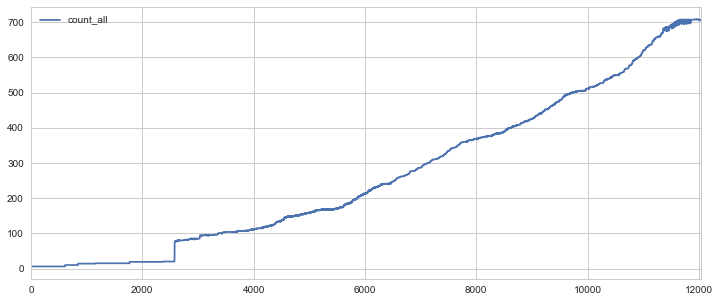

In [740]:
stock_data['count_all'].plot(legend=True,figsize=(12,5))
#stock_data['count_all']

In [752]:
stock_data['count_all'][stock_data['year']>2000].max()


708

In [639]:
#stock_data.head()

In [640]:
#stock_data.tail()

Data Aggregation
==================


Decade


In [641]:
decade_groupby = stock_data['count_all'].groupby(stock_data['decade']).count()
decade_groupby

decade
1970    2526
1980    2528
1990    2528
2000    2515
2010    1935
Name: count_all, dtype: int64

In [642]:
decade_groupby = stock_data['avg_all'].groupby(stock_data['decade']).mean()
decade_groupby

decade
1970     1.153397
1980     3.869789
1990    12.231429
2000    26.804857
2010    36.955809
Name: avg_all, dtype: float64

In [643]:
decade_groupby = stock_data['avg_all'].groupby(stock_data['decade']).std()
decade_groupby

decade
1970    0.262065
1980    1.466351
1990    6.242114
2000    6.598660
2010    7.254714
Name: avg_all, dtype: float64

In [644]:
decade_groupby = stock_data['sum_all'].groupby(stock_data['decade']).sum()
decade_groupby

decade
1970    4.105849e+04
1980    1.180551e+06
1990    8.166265e+06
2000    2.892271e+07
2010    4.533363e+07
Name: sum_all, dtype: float64

In [645]:
decade_groupby = stock_data.groupby(['decade'],as_index=False).mean()
decade_groupby

,decade,ED,DD,CVX,FL,CAT,IP,SJW,F,LLY,...,year,month,day,quarter,half_yr,avg_all,sum_all,count_all,min_all,max_all
0,1970,0.352109,0.000740,1.020324,1.598647,2.352759,2.626871,0.530164,0.328255,0.987046,...,1974.498416,6.520190,15.733571,2.507126,1.502375,1.153397,16.254350,13.503167,0.000740,4.450157
1,1980,2.678862,0.001926,3.127509,7.095895,2.938905,6.042379,1.342773,1.426453,2.642840,...,1984.498022,6.526503,15.750000,2.508703,1.503560,3.869789,466.990055,111.377373,0.001926,55.839138
2,1990,10.413444,0.009797,12.970073,13.803549,8.706384,19.858152,3.739048,7.319875,17.578816,...,1994.496440,6.534019,15.732595,2.511472,1.504747,12.231429,3230.326502,238.433940,0.009797,498.069258
3,2000,23.364301,0.025670,37.314016,12.071778,31.714613,21.895021,15.746605,8.820526,36.952690,...,2004.505368,6.539563,15.758250,2.513718,1.504573,26.804857,11500.082847,424.601988,0.024323,1575.360332
4,2010,52.934095,28.926672,89.806580,39.813036,78.129784,35.531290,28.072260,11.544702,52.088846,...,2013.358656,6.385013,15.688889,2.461499,1.485271,36.955809,23428.232969,623.061499,0.704015,2477.524548


In [646]:
decade_groupby = stock_data.groupby(['decade'],as_index=False).sum()
decade_groupby

,decade,ED,DD,CVX,FL,CAT,IP,SJW,F,LLY,...,year,month,day,quarter,half_yr,avg_all,sum_all,count_all,min_all,max_all
0,1970,889.427752,1.869261,2577.338799,4038.181721,5943.069871,6635.475938,1014.734463,628.279555,1889.205506,...,4987583,16470,39743,6333,3795,2913.479581,4.105849e+04,34109,1.869261,1.124110e+04
1,1980,6772.162647,4.869409,7906.341970,17938.423150,7429.551394,15275.135068,3394.528948,3606.072126,6681.100597,...,5016811,16499,39816,6342,3801,9782.826981,1.180551e+06,281562,4.869409,1.411613e+05
2,1990,26325.186399,24.767405,32788.343404,34895.372879,22009.738866,50201.408491,9452.313043,18504.642772,44439.247957,...,5042087,16518,39772,6349,3804,30921.051973,8.166265e+06,602761,24.767405,1.259119e+06
3,2000,58761.215997,64.559143,93844.750903,30360.522285,79762.251803,55065.977837,39602.711400,22183.621964,92936.015090,...,5041331,16447,39632,6322,3784,67414.215170,2.892271e+07,1067874,61.171926,3.962031e+06
4,2010,102427.473049,55944.183729,173775.731559,77038.224544,151181.132681,68753.046671,54319.822394,22338.998569,100791.916852,...,3895849,12355,30358,4763,2874,71509.491219,4.533363e+07,1205624,1362.268193,4.794010e+06


Day of Week

In [647]:
dayname_groupby = stock_data['count_all'].groupby(stock_data['day_name']).count()
dayname_groupby

day_name
Friday       2403
Monday       2284
Thursday     2417
Tuesday      2461
Wednesday    2467
Name: count_all, dtype: int64

In [648]:
dayname_groupby = stock_data['avg_all'].groupby(stock_data['day_name']).mean()
dayname_groupby

day_name
Friday       15.200417
Monday       15.032962
Thursday     15.227783
Tuesday      15.186721
Wednesday    15.200285
Name: avg_all, dtype: float64

In [649]:
dayname_groupby = stock_data['avg_all'].groupby(stock_data['day_name']).std()
dayname_groupby

day_name
Friday       14.190825
Monday       14.131008
Thursday     14.191043
Tuesday      14.159567
Wednesday    14.177512
Name: avg_all, dtype: float64

In [650]:
dayname_groupby = stock_data.groupby(['day_name'],as_index=False).mean()
dayname_groupby

,day_name,ED,DD,CVX,FL,CAT,IP,SJW,F,LLY,...,month,day,decade,quarter,half_yr,avg_all,sum_all,count_all,min_all,max_all
0,Friday,16.259467,4.622331,25.908137,13.650557,22.199933,16.316085,9.461371,5.864960,21.594573,...,6.530171,15.799001,1989.026217,2.508115,1.506034,15.200417,6970.099027,265.600499,0.118675,845.955819
1,Monday,16.039216,4.578967,25.548371,13.563029,21.860978,16.161632,9.318326,5.853162,21.434803,...,6.612960,15.741681,1988.883538,2.540718,1.511821,15.032962,6871.392156,263.323993,0.121456,838.504818
2,Thursday,16.279809,4.683253,25.930978,13.686562,22.221530,16.324359,9.479389,5.910027,21.668728,...,6.409185,15.581299,1989.052544,2.470004,1.489450,15.227783,6982.315429,265.900290,0.123295,849.617860
3,Tuesday,16.251598,4.683863,25.877873,13.679793,22.162843,16.307207,9.449413,5.910150,21.647851,...,6.489232,15.781390,1989.036977,2.496140,1.498171,15.186721,6959.690481,265.751321,0.121528,845.394737
4,Wednesday,16.265470,4.715299,25.910886,13.678186,22.211852,16.304140,9.474902,5.907858,21.671039,...,6.498581,15.769761,1989.027158,2.499392,1.499392,15.200285,6970.714060,265.733685,0.119693,845.376208


In [651]:
dayname_groupby = stock_data.groupby(['day_name'],as_index=False).sum()
dayname_groupby

,day_name,ED,DD,CVX,FL,CAT,IP,SJW,F,LLY,...,month,day,decade,quarter,half_yr,avg_all,sum_all,count_all,min_all,max_all
0,Friday,39071.499378,11102.837964,62257.252291,32802.288613,53346.438228,39207.552178,21609.772196,13395.569494,49322.004038,...,15692,37965,4779630,6027,3619,36526.602138,1.674915e+07,638238,285.175699,2.032832e+06
1,Monday,36633.570434,10458.361047,58352.478762,30977.958579,49930.473504,36913.166924,20183.495185,12677.948739,46427.783639,...,15104,35954,4542610,5803,3453,34335.286006,1.569426e+07,601432,277.404660,1.915145e+06
2,Thursday,39348.299022,11319.421646,62675.172669,33080.420146,53709.437865,39455.976191,21745.718105,13557.600985,49708.062086,...,15491,37660,4807540,5970,3600,36805.551659,1.687626e+07,642681,298.003428,2.053526e+06
3,Tuesday,39995.181723,11526.985797,63685.446673,33665.971715,54542.756578,40132.035722,22064.380267,13800.200936,50547.732972,...,15970,38838,4895020,6143,3687,37374.520911,1.712780e+07,654014,299.080952,2.080516e+06
4,Wednesday,40126.915287,11632.642493,63922.156240,33744.085526,54796.638440,40222.312990,22180.744495,13830.294832,50731.903267,...,16032,38904,4906930,6166,3699,37499.104209,1.719675e+07,655565,295.281455,2.085543e+06


Quarter

In [652]:
quarter_groupby = stock_data['count_all'].groupby(stock_data['quarter']).count()
quarter_groupby

quarter
1    2970
2    3036
3    3037
4    2989
Name: count_all, dtype: int64

In [653]:
quarter_groupby = stock_data['avg_all'].groupby(stock_data['quarter']).mean()
quarter_groupby

quarter
1    15.190585
2    15.488359
3    15.262576
4    14.737345
Name: avg_all, dtype: float64

In [654]:
quarter_groupby = stock_data['sum_all'].groupby(stock_data['quarter']).sum()
quarter_groupby

quarter
1    2.044990e+07
2    2.169745e+07
3    2.146719e+07
4    2.002968e+07
Name: sum_all, dtype: float64

In [655]:
quarter_groupby = stock_data.groupby(['quarter'],as_index=False).sum()
quarter_groupby

,quarter,ED,DD,CVX,FL,CAT,IP,SJW,F,LLY,...,year,month,day,decade,half_yr,avg_all,sum_all,count_all,min_all,max_all
0,1,47245.235200,12608.239875,74550.822360,39952.108607,64245.670319,47862.559257,26456.054099,16413.596132,59682.097888,...,5920429,5993,46509,5907570,2970,45116.038811,2.044990e+07,776337,344.760663,2.545564e+06
1,2,49837.274832,15653.949588,80484.491164,42675.086842,69933.844650,50178.597474,27180.843437,17583.362114,62971.795079,...,6052218,15217,47158,6039060,3036,47022.657738,2.169745e+07,810409,409.567361,2.647702e+06
2,3,50469.272445,15211.621963,79972.968981,41900.433831,68977.645267,50407.002460,27455.068133,17061.467682,63359.830493,...,6053908,24244,49185,6040780,6074,46352.443840,2.146719e+07,814545,374.267893,2.579539e+06
3,4,47623.683367,12566.437521,75884.224130,39743.095299,63168.584379,47482.884814,26692.144579,16203.189058,60723.762542,...,5957106,32835,46469,5944320,5978,44049.924535,2.002968e+07,790639,326.350277,2.394758e+06


In [656]:
quarter_groupby = stock_data.groupby(['quarter'],as_index=False).mean()
quarter_groupby

,quarter,ED,DD,CVX,FL,CAT,IP,SJW,F,LLY,...,year,month,day,decade,half_yr,avg_all,sum_all,count_all,min_all,max_all
0,1,15.907487,4.245199,25.101287,13.451888,21.631539,16.115340,9.502893,5.895688,21.437535,...,1993.410438,2.017845,15.659596,1989.080808,1.0,15.190585,6885.486910,261.392929,0.116081,857.092382
1,2,16.415440,5.156110,26.510043,14.056353,23.034863,16.527865,9.483895,6.135158,21.972015,...,1993.484190,5.012187,15.532938,1989.150198,1.0,15.488359,7146.721172,266.933136,0.134904,872.102213
2,3,16.618134,5.010416,26.332884,13.796653,22.712428,16.597630,9.437975,5.865063,21.780622,...,1993.384261,7.982878,16.195258,1989.061574,2.0,15.262576,7068.550715,268.207112,0.123236,849.370597
3,4,15.932982,4.204228,25.387830,13.296452,21.133685,15.885876,9.329656,5.663470,21.224664,...,1993.009702,10.985279,15.546671,1988.732017,2.0,14.737345,6701.132076,264.516226,0.109184,801.190218


Half Year (6 mo)


In [657]:
half_yr_groupby = stock_data['count_all'].groupby(stock_data['half_yr']).count()
half_yr_groupby

half_yr
1    6006
2    6026
Name: count_all, dtype: int64

In [658]:
half_yr_groupby = stock_data['sum_all'].groupby(stock_data['half_yr']).sum()
half_yr_groupby

half_yr
1    4.214734e+07
2    4.149687e+07
Name: sum_all, dtype: float64

In [659]:
half_yr_groupby = stock_data['avg_all'].groupby(stock_data['half_yr']).mean()
half_yr_groupby

half_yr
1    15.341108
2    15.002053
Name: avg_all, dtype: float64

In [660]:
half_yr_groupby = stock_data.groupby(['half_yr'],as_index=False).sum()
half_yr_groupby

,half_yr,ED,DD,CVX,FL,CAT,IP,SJW,F,LLY,...,year,month,day,decade,quarter,avg_all,sum_all,count_all,min_all,max_all
0,1,97082.510032,28262.189463,155035.313524,82627.195449,134179.514969,98041.156731,53636.897536,33996.958246,122653.892967,...,11972647,21210,93667,11946630,9042,92138.696549,4.214734e+07,1586746,754.328024,5.193267e+06
1,2,98092.955812,27778.059484,155857.193111,81643.529130,132146.229646,97889.887274,54147.212712,33264.656740,124083.593035,...,12011014,57079,95654,11985100,21067,90402.368374,4.149687e+07,1605184,700.618170,4.974296e+06


In [661]:
half_yr_groupby = stock_data.groupby(['half_yr'],as_index=False).mean()
half_yr_groupby

,half_yr,ED,DD,CVX,FL,CAT,IP,SJW,F,LLY,...,year,month,day,decade,quarter,avg_all,sum_all,count_all,min_all,max_all
0,1,16.164254,4.705659,25.813406,13.757442,22.340912,16.323869,9.493256,6.017161,21.708654,...,1993.447719,3.531469,15.595571,1989.115884,1.505495,15.341108,7017.539394,264.193473,0.125596,864.679769
1,2,16.278287,4.610466,25.864121,13.548544,21.929344,16.244588,9.384266,5.765105,21.504955,...,1993.198473,9.472121,15.873548,1988.898108,3.496017,15.002053,6886.304729,266.376369,0.116266,825.472297


Years

In [737]:
years_groupby = stock_data['count_all'].replace(NaN,0).groupby(stock_data['year']).count()
years_groupby

year
1970    254
1971    253
1972    251
1973    252
1974    253
1975    253
1976    253
1977    252
1978    252
1979    253
1980    253
1981    253
1982    253
1983    253
1984    253
1985    252
1986    253
1987    253
1988    253
1989    252
1990    253
1991    253
1992    254
1993    253
1994    252
1995    252
1996    254
1997    253
1998    252
1999    252
2000    252
2001    248
2002    252
2003    252
2004    252
2005    252
2006    251
2007    251
2008    253
2009    252
2010    252
2011    252
2012    250
2013    252
2014    252
2015    252
2016    252
2017    173
Name: count_all, dtype: int64

In [663]:
years_groupby = stock_data['sum_all'].groupby(stock_data['year']).sum()
years_groupby.head(),years_groupby.tail()

(year
 1970    1379.952001
 1971    1763.375802
 1972    2389.499695
 1973    3100.096301
 1974    2769.259275
 Name: sum_all, dtype: float64, year
 2013    6.319880e+06
 2014    7.517666e+06
 2015    7.172572e+06
 2016    6.883239e+06
 2017    5.480170e+06
 Name: sum_all, dtype: float64)

In [664]:
years_groupby = stock_data['avg_all'].groupby(stock_data['year']).mean()
years_groupby.head(),years_groupby.tail()

(year
 1970    0.905480
 1971    1.161644
 1972    1.146690
 1973    0.988732
 1974    0.759986
 Name: avg_all, dtype: float64, year
 2013    40.881393
 2014    45.712072
 2015    41.401916
 2016    38.747579
 2017    44.783624
 Name: avg_all, dtype: float64)

In [665]:
years_groupby = stock_data.groupby(['year'],as_index=False).sum()
years_groupby.head()

,year,ED,DD,CVX,FL,CAT,IP,SJW,F,LLY,...,month,day,decade,quarter,half_yr,avg_all,sum_all,count_all,min_all,max_all
0,1970,73.756515,0.132184,133.878837,416.772719,333.481009,421.930737,NaN,NaN,NaN,...,1662,3982,500380,639,382,229.992000,1379.952001,1524,0.132184,429.232403
1,1971,82.246718,0.173462,172.500161,625.196432,436.219098,447.039931,NaN,NaN,NaN,...,1660,3961,498410,636,381,293.895967,1763.375802,1518,0.173462,625.196432
2,1972,84.494968,0.208493,206.626735,501.109116,521.221200,489.155099,74.637154,49.386021,167.757435,...,1621,3942,494470,624,375,287.819309,2389.499695,2090,0.208493,558.823614
3,1973,82.444191,0.219412,246.943885,311.706354,574.240476,570.456033,140.694222,75.771676,325.586422,...,1644,3970,496440,633,379,249.160483,3100.096301,3192,0.219412,601.367390
4,1974,43.438449,0.188930,187.937268,209.935105,497.750894,644.647891,122.356975,59.989667,281.065280,...,1649,3982,498410,636,381,192.276475,2769.259275,3652,0.188930,644.647891


In [666]:
years_groupby = stock_data.groupby(['year'],as_index=False).mean()
years_groupby.head()

,year,ED,DD,CVX,FL,CAT,IP,SJW,F,LLY,...,month,day,decade,quarter,half_yr,avg_all,sum_all,count_all,min_all,max_all
0,1970,0.290380,0.000520,0.527082,1.640837,1.312917,1.661145,NaN,NaN,NaN,...,6.543307,15.677165,1970.0,2.515748,1.503937,0.905480,5.432882,6.000000,0.000520,1.689891
1,1971,0.325086,0.000686,0.681819,2.471132,1.724186,1.766956,NaN,NaN,NaN,...,6.561265,15.656126,1970.0,2.513834,1.505929,1.161644,6.969865,6.000000,0.000686,2.471132
2,1972,0.336633,0.000831,0.823214,1.996451,2.076578,1.948825,0.511213,0.338260,1.149024,...,6.458167,15.705179,1970.0,2.486056,1.494024,1.146690,9.519919,8.326693,0.000831,2.226389
3,1973,0.327159,0.000871,0.979936,1.236930,2.278732,2.263714,0.558310,0.300681,1.292010,...,6.523810,15.753968,1970.0,2.511905,1.503968,0.988732,12.301969,12.666667,0.000871,2.386379
4,1974,0.171693,0.000747,0.742835,0.829783,1.967395,2.548015,0.483624,0.237113,1.110930,...,6.517787,15.739130,1970.0,2.513834,1.505929,0.759986,10.945689,14.434783,0.000747,2.548015


Year by Quarter

In [667]:
Year_Quarter = stock_data['count_all'].groupby([stock_data['year'],stock_data['quarter']]).count()
Year_Quarter[:20]

year  quarter
1970  1          61
      2          65
      3          64
      4          64
1971  1          62
      2          63
      3          64
      4          64
1972  1          63
      2          64
      3          63
      4          61
1973  1          62
      2          63
      3          63
      4          64
1974  1          62
      2          63
      3          64
      4          64
Name: count_all, dtype: int64

In [668]:
Year_Quarter = stock_data['sum_all'].groupby([stock_data['year'],stock_data['quarter']]).sum()
Year_Quarter[:20]

year  quarter
1970  1          344.662873
      2          338.682359
      3          336.259332
      4          360.347437
1971  1          416.947527
      2          463.053436
      3          451.724650
      4          431.650189
1972  1          435.656070
      2          534.623153
      3          704.149110
      4          715.071362
1973  1          721.347561
      2          771.114743
      3          798.218396
      4          809.415601
1974  1          722.668397
      2          698.862209
      3          687.724639
      4          660.004030
Name: sum_all, dtype: float64

In [669]:
Year_Quarter = stock_data['avg_all'].groupby([stock_data['year'],stock_data['quarter']]).mean()
Year_Quarter[:20]

year  quarter
1970  1          0.941702
      2          0.868416
      3          0.875675
      4          0.938405
1971  1          1.120827
      2          1.225009
      3          1.176366
      4          1.124089
1972  1          1.152529
      2          1.145124
      3          1.117697
      4          1.172248
1973  1          1.163464
      2          0.987218
      3          0.905010
      4          0.903366
1974  1          0.832567
      2          0.792361
      3          0.730286
      4          0.687504
Name: avg_all, dtype: float64

In [670]:
Year_Quarter = stock_data.groupby([stock_data['year'],stock_data['quarter']]).mean()
#Year_Quarter['qtr_pct']=Year_Quarter['avg_all'].pct_change()
Year_Quarter[:20]

ED        DD       CVX        FL       CAT        IP  \
year quarter                                                               
1970 1        0.310558  0.000445  0.527545  1.711722  1.399833  1.700108   
     2        0.293067  0.000503  0.480413  1.509571  1.338504  1.588439   
     3        0.275255  0.000559  0.514623  1.598846  1.181194  1.683575   
     4        0.283543  0.000571  0.586498  1.748584  1.335812  1.675419   
1971 1        0.331517  0.000650  0.655595  2.269339  1.651261  1.816597   
     2        0.323802  0.000681  0.715452  2.622540  1.818852  1.868727   
     3        0.321348  0.000710  0.684481  2.519311  1.817580  1.714769   
     4        0.323857  0.000701  0.671453  2.469399  1.608252  1.670873   
1972 1        0.339942  0.000781  0.741241  2.240442  1.769340  1.823430   
     2        0.330289  0.000826  0.737158  2.020246  1.967477  2.004970   
     3        0.334205  0.000854  0.834575  1.900511  2.247046  1.910601   
     4        0.342381  0.000862  0.986431  1.818580  2.332302  2.058902   
1973 1        0.344560  0.000877  1.083844  1.405934  2.307728  2.103953   
     2        0.336426  0.000861  1.056419  1.190706  2.143577  1.978296   
     3        0.320440  0.000852  0.913517  1.198103  2.235761  2.222608   
     4        0.307795  0.000892  0.869369  1.156930  2.425985  2.739906   
1974 1        0.307482  0.000855  0.830684  1.025033  2.160950  2.796489   
     2        0.160975  0.000892  0.778477  0.959923  2.140403  2.702618   
     3        0.110765  0.000720  0.708287  0.731445  1.839103  2.543115   
     4        0.111628  0.000525  0.657194  0.610866  1.737875  2.160020   

                   SJW         F       LLY       AVP    ...     BTU  \
year quarter                                            ...           
1970 1             NaN       NaN       NaN       NaN    ...     NaN   
     2             NaN       NaN       NaN       NaN    ...     NaN   
     3             NaN       NaN       NaN       NaN    ...     NaN   
     4             NaN       NaN       NaN       NaN    ...     NaN   
1971 1             NaN       NaN       NaN       NaN    ...     NaN   
     2             NaN       NaN       NaN       NaN    ...     NaN   
     3             NaN       NaN       NaN       NaN    ...     NaN   
     4             NaN       NaN       NaN       NaN    ...     NaN   
1972 1             NaN       NaN       NaN       NaN    ...     NaN   
     2        0.504919  0.320020  1.030873  1.904250    ...     NaN   
     3        0.515214  0.323084  1.152700  1.958180    ...     NaN   
     4        0.509351  0.360513  1.187838  2.125322    ...     NaN   
1973 1        0.532957  0.355037  1.287326  2.212422    ...     NaN   
     2        0.583310  0.304871  1.333100  2.157393    ...     NaN   
     3        0.567388  0.286649  1.290405  1.871011    ...     NaN   
     4        0.549327  0.257713  1.257678  1.363093    ...     NaN   
1974 1        0.547285  0.247266  1.102437  0.915979    ...     NaN   
     2        0.517506  0.279154  1.214431  0.808172    ...     NaN   
     3        0.436951  0.236428  1.060283  0.487944    ...     NaN   
     4        0.435274  0.186579  1.067920  0.463498    ...     NaN   

                  month        day  decade  half_yr   avg_all    sum_all  \
year quarter                                                               
1970 1         2.000000  15.459016  1970.0      1.0  0.941702   5.650211   
     2         5.000000  15.461538  1970.0      1.0  0.868416   5.210498   
     3         7.984375  16.312500  1970.0      2.0  0.875675   5.254052   
     4        11.000000  15.468750  1970.0      2.0  0.938405   5.630429   
1971 1         2.048387  15.241935  1970.0      1.0  1.120827   6.724960   
     2         5.015873  15.730159  1970.0      1.0  1.225009   7.350055   
     3         8.000000  16.218750  1970.0      2.0  1.176366   7.058198   
     4        11.015625  15.421875  1970.0      2.0  1.124089   6.744534   
1972 1         2.015873 

Descriptive Statistics Plots
=============================

Average Yearly Quarterly Closing

In [671]:
Year_Quarter_avg = stock_data['avg_all'].groupby([stock_data['year'],stock_data['quarter']]).mean()
Year_Quarter_std = stock_data['avg_all'].groupby([stock_data['year'],stock_data['quarter']]).std()
Year_Quarter_lb=Year_Quarter_avg-1.96*(Year_Quarter_std)
Year_Quarter_ub=Year_Quarter_avg+1.96*(Year_Quarter_std)

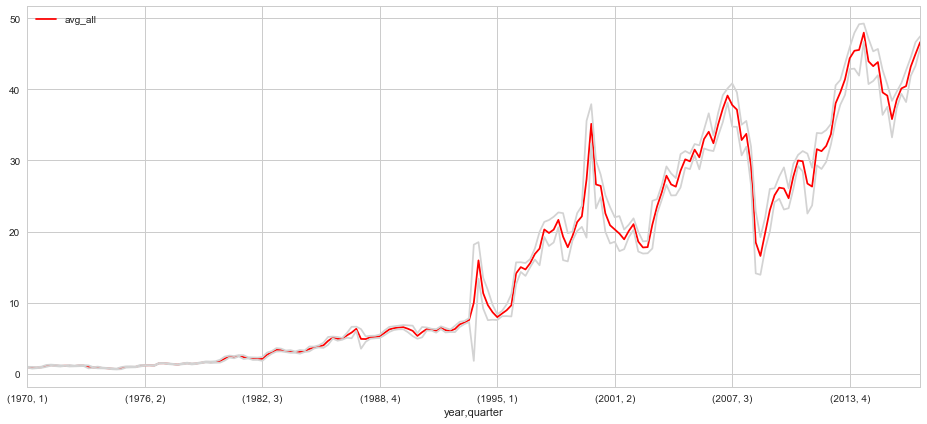

In [672]:
Year_Quarter_avg.plot(legend=True,figsize=(16,7),color='red')
Year_Quarter_lb.plot(figsize=(16,7),color='lightgrey')
Year_Quarter_ub.plot(figsize=(16,7),color='lightgrey')

Quarterly Percent Change

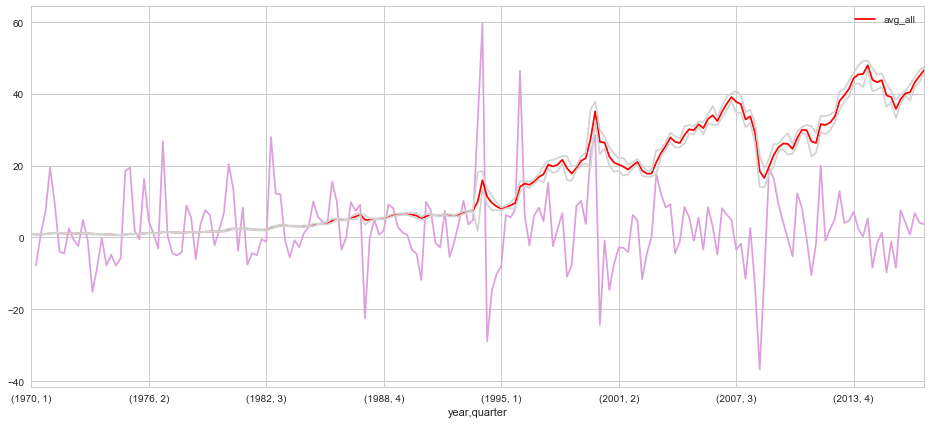

In [673]:
Year_Quarter['qtr_pct']=Year_Quarter['avg_all'].pct_change()
Year_qtr_pct=Year_Quarter['qtr_pct']*100
Year_qtr_pct.plot(figsize=(16,7),color='plum')

Year_Quarter_avg.plot(legend=True,figsize=(16,7),color='red')
Year_Quarter_lb.plot(figsize=(16,7),color='lightgrey')
Year_Quarter_ub.plot(figsize=(16,7),color='lightgrey')

Yearly Closing

In [676]:
years_groupby_avg = stock_data['avg_all'].groupby(stock_data['year']).mean()
years_groupby_std = stock_data['avg_all'].groupby(stock_data['year']).std()
years_groupby_lb=years_groupby_avg-1.96*(years_groupby_std)
years_groupby_ub=years_groupby_avg+1.96*(years_groupby_std)

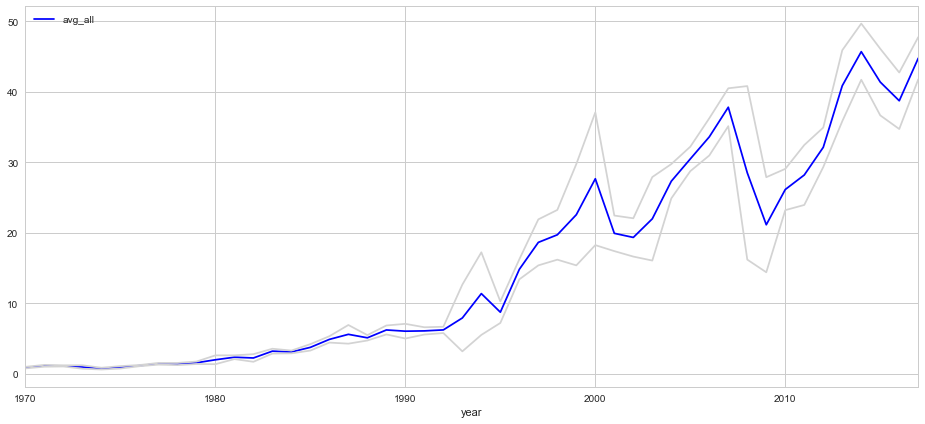

In [677]:
years_groupby_avg.plot(legend=True,figsize=(16,7),color='blue')
years_groupby_lb.plot(figsize=(16,7),color='lightgrey')
years_groupby_ub.plot(figsize=(16,7),color='lightgrey')

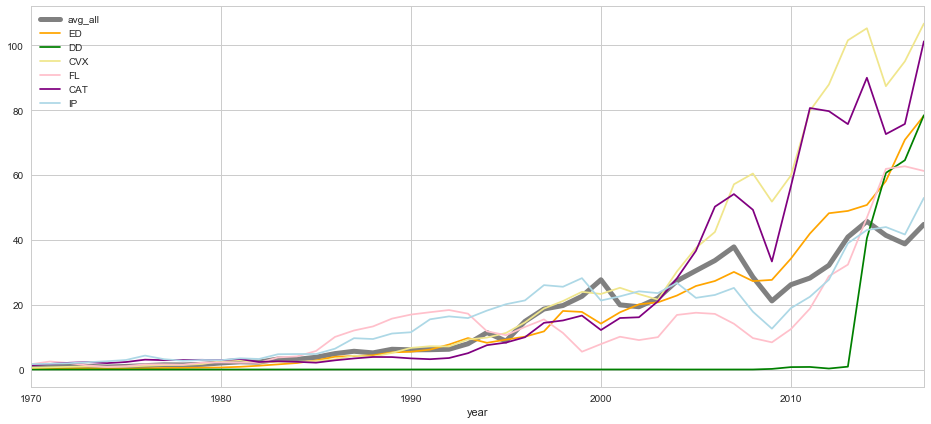

In [678]:
years_groupby_avg = stock_data.groupby(stock_data['year']).mean()
years_groupby_lb=years_groupby_avg['avg_all']-1.96*(years_groupby_std)
years_groupby_ub=years_groupby_avg['avg_all']+1.96*(years_groupby_std)

years_groupby_avg['avg_all'].plot(legend=True,figsize=(16,7),color='gray',linewidth=5)
#years_groupby_lb.plot(figsize=(16,7),color='lightgrey')
#years_groupby_ub.plot(figsize=(16,7),color='lightgrey')
years_groupby_avg['ED'].plot(legend=True,figsize=(16,7),color='orange')
years_groupby_avg['DD'].plot(legend=True,figsize=(16,7),color='green')
years_groupby_avg['CVX'].plot(legend=True,figsize=(16,7),color='khaki')
years_groupby_avg['FL'].plot(legend=True,figsize=(16,7),color='pink')
years_groupby_avg['CAT'].plot(legend=True,figsize=(16,7),color='purple')
years_groupby_avg['IP'].plot(legend=True,figsize=(16,7),color='lightblue')

Yearly Percent Change

In [679]:
years_groupby_avg = stock_data.groupby(stock_data['year']).mean()
years_groupby_avg['min_max']=years_groupby_avg['min_all']-years_groupby_avg['max_all']
years_groupby_avg['avg_log']=np.log(years_groupby_avg['avg_all'])

In [680]:
#years_groupby_avg['avg_all'].plot(legend=True,figsize=(16,7),color='red')
#years_groupby_avg['avg_log'].plot(legend=True,figsize=(16,7),color='green')


In [681]:
#years_groupby_avg['avg_pct_change']=years_groupby_avg['avg_all'].pct_change()
#years_groupby_avg['avg_log_pct_change']=years_groupby_avg['avg_log'].pct_change()

#years_groupby_avg['avg_pct_change'].plot(legend=True,figsize=(16,7),color='red')
#years_groupby_avg['avg_log_pct_change'].plot(legend=True,figsize=(16,7),color='blue')

Distribution

In [682]:
stock_data['avg_all'].mean(),stock_data['avg_all'].std()

(15.171298613976987, 14.168217295435538)

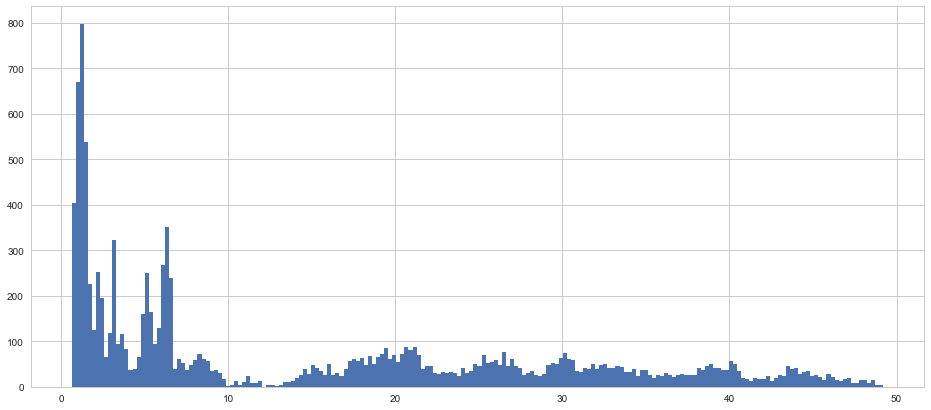

In [683]:
NaN_hist=stock_data['avg_all'].replace(np.NaN,0)
fig = plt.figure(figsize=(16,7))
ax = fig.add_subplot(111)
ax.hist(NaN_hist, 200)
plt.show()

Daily Percent Change

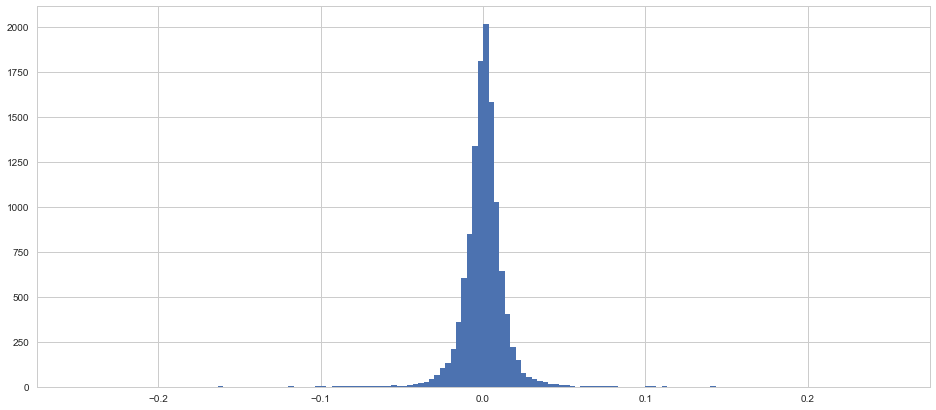

In [684]:
NaN_hist=stock_data['avg_all'].pct_change().replace(np.NaN,0)
fig = plt.figure(figsize=(16,7))
nbins = 150
xmin = -.25
xmax = .25

ax = fig.add_subplot(111)
ax.hist(NaN_hist, bins=nbins,range=[xmin,xmax])
plt.show()


In [685]:
import scipy.stats as sp
sp.skew(NaN_hist)

38.28954411196672

In [686]:
sp.kurtosis(NaN_hist)

2905.539377476321

Rejecting Outliers > 2 Stand. Dev.

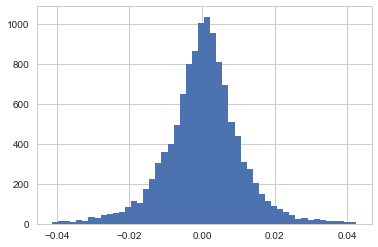

In [687]:
def reject_outliers(data):
    u = np.median(data)
    s = np.std(data)
    filtered = [e for e in data if (u - 2 * s < e < u + 2 * s)]
    return filtered

filtered = reject_outliers(NaN_hist)

plt.hist(filtered, 50)
plt.show()

In [688]:
sp.skew(filtered)

-0.060866190296143576

In [689]:
sp.kurtosis(filtered)

1.6957835195864401

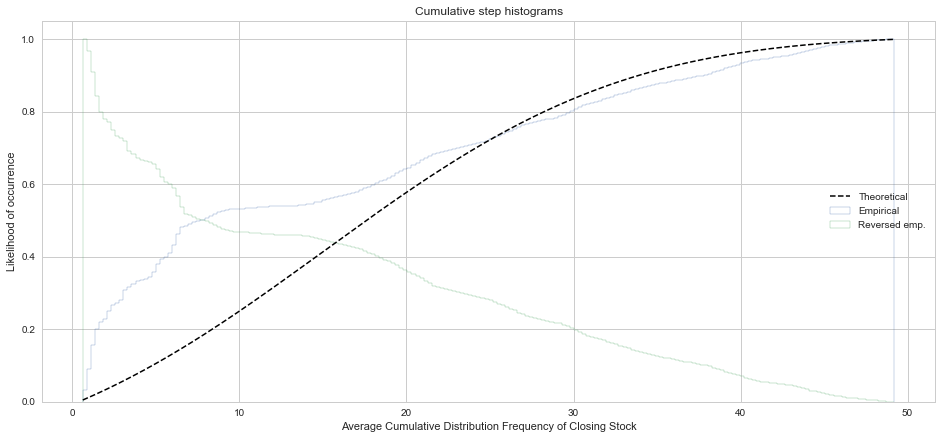

In [690]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import mlab

mu = stock_data['avg_all'].mean()
sigma = stock_data['avg_all'].std()
n_bins = 200

x = stock_data['avg_all']

fig, ax = plt.subplots(figsize=(16,7))

# plot the cumulative histogram
n, bins, patches = ax.hist(x, n_bins, normed=1, histtype='step',
                           cumulative=True, label='Empirical')

# Add a line showing the expected distribution.
y = mlab.normpdf(bins, mu, sigma).cumsum()
y /= y[-1]

ax.plot(bins, y, 'k--', linewidth=1.5, label='Theoretical')

# Overlay a reversed cumulative histogram.
ax.hist(x, bins=bins, normed=1, histtype='step', cumulative=-1,
        label='Reversed emp.')

# tidy up the figure
ax.grid(True)
ax.legend(loc='right')
ax.set_title('Cumulative step histograms')
ax.set_xlabel('Average Cumulative Distribution Frequency of Closing Stock')
ax.set_ylabel('Likelihood of occurrence')

plt.show()

Pareto Distribution

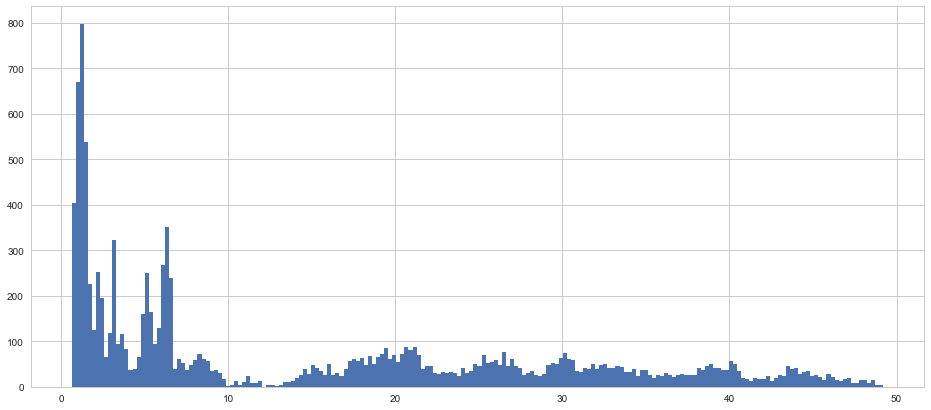

In [691]:
NaN_hist=stock_data['avg_all'].replace(np.NaN,0)
fig = plt.figure(figsize=(16,7))
ax = fig.add_subplot(111)
ax.hist(NaN_hist, 200)
plt.show()

In [692]:
NaN_hist.mode()

0    1.200267
dtype: float64

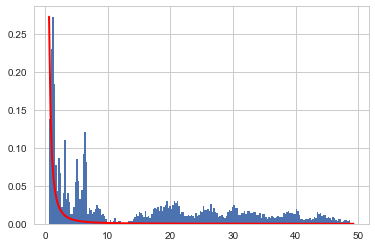

In [693]:
a, m = 1, 1.200267  # shape and mode
s = NaN_hist


count, bins, _ = plt.hist(s, 200, normed=True)
fit = a*m**a / bins**(a+1)
plt.plot(bins, max(count)*fit/max(fit), linewidth=2, color='r')
plt.show()

Before and After Y2K
=======================

Years leading up to Y2k and after

In [694]:
y2k_groupby_avg = stock_data[stock_data['year']>1995].groupby([stock_data['year'],stock_data['quarter']]).mean()
y2k_groupby_avg

ED         DD         CVX         FL         CAT  \
year quarter                                                            
1996 1        10.971351   0.010114   13.136311   8.835209    9.340255   
     2         9.829155   0.010648   14.174684  13.726105    9.538915   
     3         9.521935   0.010874   14.606068  14.412051   10.115214   
     4        10.224803   0.012556   16.205661  15.476761   10.842223   
1997 1        10.986776   0.014536   16.721237  14.612565   11.501125   
     2        10.553425   0.014775   17.499672  15.721685   13.843997   
     3        11.704111   0.017441   20.092728  17.241158   16.748139   
     4        13.761135   0.016250   20.788113  14.239322   15.340887   
1998 1        16.390424   0.016742   20.288554  15.791934   15.302223   
     2        17.310004   0.020849   21.248353  14.948573   16.589710   
     3        17.949129   0.017058   21.112057   8.975145   14.546961   
     4        20.532726   0.016063   21.820637   5.666986   14.118821   
1999 1        19.372909   0.015336   21.430787   3.843921   14.179651   
     2        18.767276   0.019111   25.138400   6.747386   18.201135   
     3        17.916827   0.019346   25.145034   6.300211   18.188557   
     4        15.077211   0.017830   24.061090   5.026675   15.894044   
2000 1        12.981392   0.016198   22.322254   4.651337   12.909221   
     2        13.951286   0.014594   24.603846   7.593893   12.189085   
     3        14.055760   0.012953   23.242220   9.675548   11.563298   
     4        15.634581   0.012687   23.057883   9.452098   12.044719   
2001 1        15.944462   0.012904   23.881920   8.734528   14.150615   
     2        17.369344   0.013675   26.594188   9.623346   16.746534   
     3        18.739499   0.012432   25.396306  11.371755   16.691987   
     4        18.566228   0.012698   25.019163  10.780430   15.980729   
2002 1        19.576520   0.013717   25.022524  10.925090   17.687307   
     2        20.584043   0.013937   25.483335  10.493808   17.736148   
     3        19.576326   0.012582   22.198616   7.473431   14.484910   
     4        20.670686   0.013046   20.476058   7.527624   14.677636   
2003 1        19.980620   0.012263   19.588443   7.186433   15.856198   
     2        20.766523   0.013296   20.779226   8.291474   18.425289   
...                 ...        ...         ...        ...         ...   
2010 2        32.497795   0.808907   58.342364  12.454273   52.100882   
     3        35.080188   0.779287   58.460596  11.412554   56.811563   
     4        37.113043   0.824834   66.093230  15.052254   69.676500   
2011 1        38.102512   0.581043   77.123021  16.542079   83.126186   
     2        40.403591   0.603925   81.630732  19.751899   87.621933   
     3        42.803138   1.155493   78.896151  18.599813   76.791927   
     4        46.358220   0.799044   81.680625  20.194572   75.290031   
2012 1        46.777828   0.229072   86.854236  25.122201   91.876686   
     2        48.313706   0.255331   83.078190  27.525024   80.253261   
     3        50.558667   0.325433   91.457109  31.192557   73.460478   
     4        47.182919   0.396506   90.326012  31.266775   73.356131   
2013 1        47.906026   0.553703   96.796631  30.955685   80.455131   
     2        50.482463   0.827959  101.646382  31.883846   73.750055   
     3        48.956495   0.960345  104.208021  32.267830   73.856940   
     4        48.302279   1.146587  103.340362  34.249876   75.083532   
2014 1        47.089343   1.472480  100.310038  39.048479   83.498798   
     2        49.041678  37.591864  108.226160  45.203179   93.482504   
     3        50.430641  58.543595  111.926259  49.941436   94.995078   
     4        56.314561  62.561652  100.536279  52.914696   87.876636   
2015 1        58.844611  67.214766   95.382335  54.284028   75.636909   
     2        55.226672  63.842748   94.735663  59.960217   78.914857   
     3        58.487536  50.939909   76.771791  68.666202   70.825492   
     4

In [695]:
y2k_groupby_avg = stock_data['avg_all'][stock_data['year']>1994].groupby([stock_data['year'],stock_data['quarter']]).mean()
y2k_groupby_avg[:37]

year  quarter
1995  1           7.974578
      2           8.475514
      3           8.949710
      4           9.648376
1996  1          14.128519
      2          15.008089
      3          14.677124
      4          15.561143
1997  1          16.852897
      2          17.616159
      3          20.303961
      4          19.802681
1998  1          20.274808
      2          21.648734
      3          19.290510
      4          17.799722
1999  1          19.356728
      2          21.337506
      3          22.141062
      4          27.356217
2000  1          35.148058
      2          26.624022
      3          26.420917
      4          22.560005
2001  1          20.889541
      2          20.297354
      3          19.713246
      4          18.909969
2002  1          20.100990
      2          21.046889
      3          18.595799
      4          17.768067
2003  1          17.819719
      2          20.972736
      3          23.533159
      4          25.494832
2004  1       

In [696]:
y2k_groupby_avg = stock_data['avg_all'][stock_data['year']>1990].groupby(stock_data['year']).mean()
y2k_groupby_std = stock_data['avg_all'][stock_data['year']>1990].groupby(stock_data['year']).std()
y2k_groupby_lb=y2k_groupby_avg-1.96*(y2k_groupby_std)
y2k_groupby_ub=y2k_groupby_avg+1.96*(y2k_groupby_std)

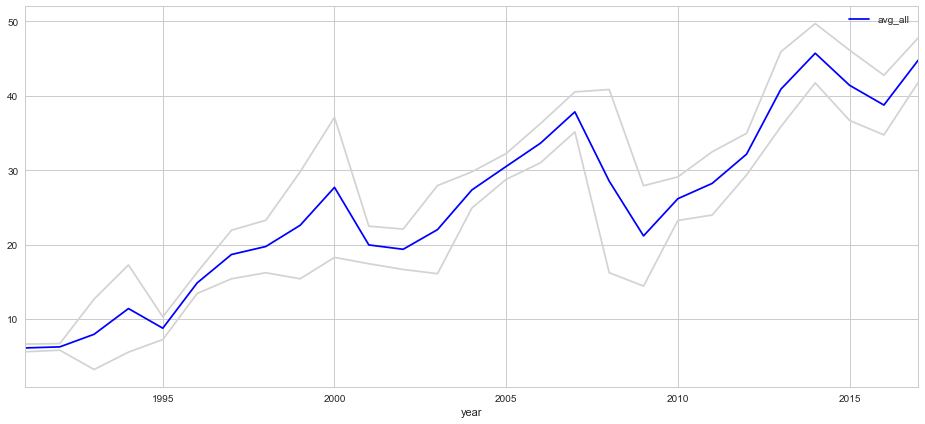

In [697]:
y2k_groupby_avg.plot(legend=True,figsize=(16,7),color='blue')
y2k_groupby_lb.plot(figsize=(16,7),color='lightgrey')
y2k_groupby_ub.plot(figsize=(16,7),color='lightgrey')

Min

In [698]:
y2k_data_min=stock_data[stock_data['year']>1990].copy()
y2k_data_max=stock_data[stock_data['year']>1990].copy()

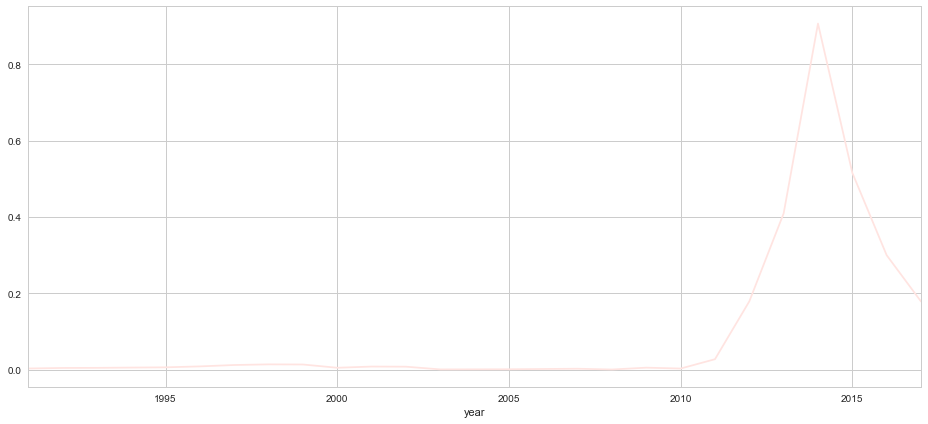

In [699]:
y2k_groupby_min=y2k_data_min['min_all'].groupby(y2k_data_min['year']).min()
y2k_groupby_min.plot(figsize=(16,7),color='mistyrose')

In [700]:
y2k_data_min=y2k_data_min.loc[:,'Date':'BTU'].copy()
y2k_data_min['year']=y2k_data_min['Date'].dt.year
y2k_data_min['min_all']=y2k_data_min.loc[:,'ED':'BTU'].min(axis=1)
y2k_data_min['year']=y2k_data_min['Date'].dt.year
y2k_data_min_gb=y2k_data_min.groupby(y2k_data_min['year']).min()
value_list =y2k_data_min_gb['min_all']
#y2k_data_min_gb


In [701]:
minimum=y2k_data_min_gb[y2k_data_min_gb.isin(value_list)]
minimum.dropna(axis=1,how='all')

,DD,MUX,SUN,HMY,CETV,BST,CTAA,SB,ELJ,min_all
year,,,,,,,,,,
1991,0.003621,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.003621
1992,0.005015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.005015
1993,0.005292,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.005292
1994,0.006035,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.006035
1995,0.006687,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.006687
1996,0.009122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.009122
1997,0.012756,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.012756
1998,0.014415,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.014415
1999,0.014089,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.014089


Max

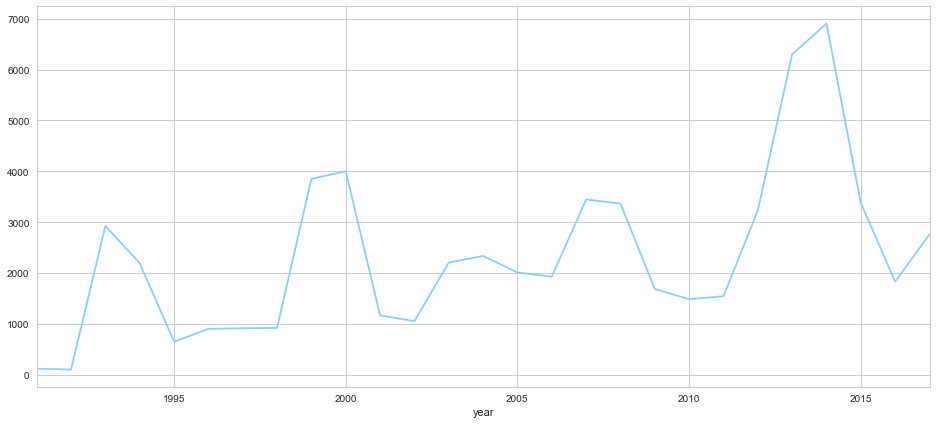

In [702]:
y2k_groupby_max=y2k_data_max['max_all'].groupby(y2k_data_max['year']).max()
y2k_groupby_max.plot(figsize=(16,7),color='lightskyblue')

In [703]:
y2k_data_max=y2k_data_max.loc[:,'Date':'BTU'].copy()
y2k_data_max['year']=y2k_data_max['Date'].dt.year
y2k_data_max['max_all']=y2k_data_max.loc[:,'ED':'BTU'].max(axis=1)
y2k_data_max['year']=y2k_data_max['Date'].dt.year
y2k_data_max_gb=y2k_data_max.groupby(y2k_data_min['year']).max()
value_list =y2k_data_max_gb['max_all']

In [704]:
maximum=y2k_data_max_gb[y2k_data_max_gb.isin(value_list)]
maximum.dropna(axis=1,how='all')

,GHC,NVR,AVNW,ARWR,FTAI,EMITF,FBC,ACTA,BCEI,max_all
year,,,,,,,,,,
1991,NaN,NaN,120.0,NaN,NaN,NaN,NaN,NaN,NaN,120.000000
1992,103.203735,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,103.203735
1993,NaN,NaN,NaN,2925.00,NaN,NaN,NaN,NaN,NaN,2925.000000
1994,NaN,NaN,NaN,2193.75,NaN,NaN,NaN,NaN,NaN,2193.750000
1995,NaN,NaN,NaN,650.00,NaN,NaN,NaN,NaN,NaN,650.000000
1996,NaN,NaN,NaN,NaN,900.859131,NaN,NaN,NaN,NaN,900.859131
1997,NaN,NaN,NaN,NaN,914.031433,NaN,NaN,NaN,NaN,914.031433
1998,NaN,NaN,NaN,NaN,921.179871,NaN,NaN,NaN,NaN,921.179871
1999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3850.0,NaN,3850.000000


Normalization
=============

In [705]:
#stock_data[100:200]

In [706]:
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from scipy import stats
from scipy.stats import boxcox
from scipy.stats import skew
import scipy.stats as st

from pylab import *
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn import datasets
from sklearn import svm

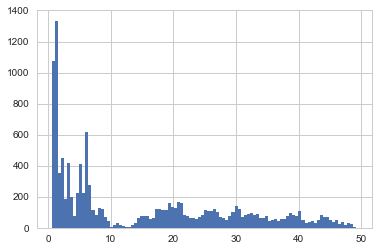

In [707]:
x=stock_data['avg_all']
plt.hist(x, bins=100) 
plt.show()

Common Transformations

In [708]:
x=stock_data['avg_all']
y=stock_data['year']
#transform = np.asarray(x.values)

max_percent=(x/x.max())
z_score=((x-x.mean())/x.std())
euclid=(x/len(abs(x)))
min_max=(x-min(x))/(max(x)-min(x))
box_cox=preprocessing.scale(boxcox(x+1)[0])

#skness = skew(x)
log_x=np.log(x)
sqrt_x=np.sqrt(x)
rec_x=1/x
log_10=np.log10(x)
log_2=np.log2(x)
log_base_e=np.log1p(x)
#min_max_denormal=x(max−min)+min

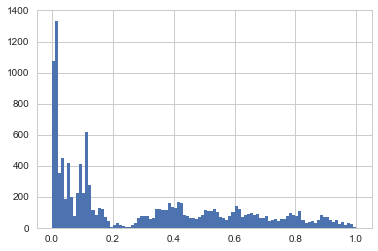

In [709]:
#plt.hist(max_percent, bins=100)
#plt.hist(z_score, bins=100) 
#plt.hist(euclid, bins=100) 
plt.hist(min_max, bins=100) 
#plt.hist(box_cox, bins=100) 
#plt.hist(log_x, bins=100) 
#plt.hist(sqrt_x, bins=100) 
#plt.hist(rec_x, bins=100) 
#plt.hist(log_10, bins=100) 
#plt.hist(log_2, bins=100) 
#plt.hist(log_base_e, bins=100)

plt.show()

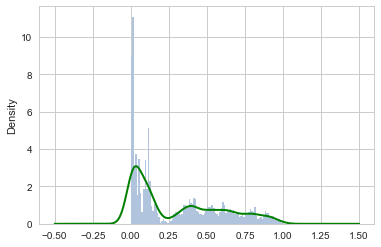

In [710]:
min_max.hist(bins=100, color='LightSteelBlue', normed=True)
min_max.plot(kind='kde',lw=2,color='green')

Probability Plot

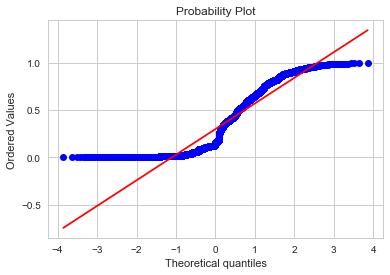

In [711]:
stats.probplot(min_max, dist='norm', fit=True,plot=plt)
plt.show()

Normal Plot

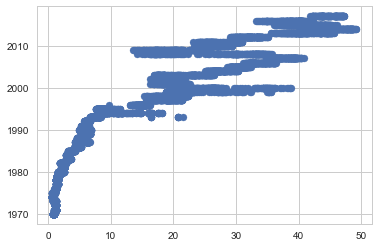

In [712]:
scatter(stock_data['avg_all'], stock_data['year'])

In [713]:
stock_data['avg_all'].describe()

count    12032.000000
mean        15.171299
std         14.168217
min          0.631077
25%          2.327281
50%          7.820055
75%         26.449275
max         49.205988
Name: avg_all, dtype: float64

Log Transformed

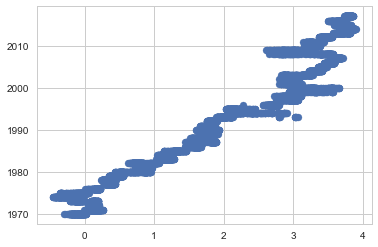

In [714]:
scatter(log_x, stock_data['year'])

In [715]:
log_x.describe()

count    12032.000000
mean         2.049987
std          1.317823
min         -0.460328
25%          0.844700
50%          2.056691
75%          3.275229
max          3.896015
Name: avg_all, dtype: float64

In [716]:
skew(log_x)

-0.28873433921457403

In [717]:
sp.kurtosis(log_x)

-1.333243457298986

Split Train Test Data

In [718]:
trainX = log_x.sample(frac=0.8,random_state=200)
testX = log_x.drop(trainX.index)

trainY = y.sample(frac=0.8,random_state=200)
testY = y.drop(trainY.index)

Train

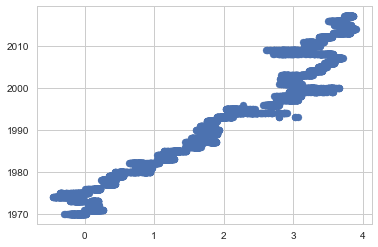

In [719]:
scatter(trainX, trainY)

Test

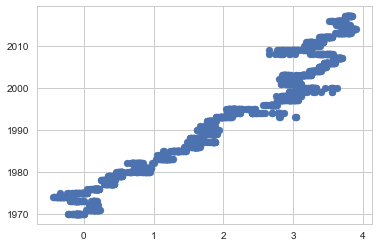

In [720]:
scatter(testX, testY)

In [721]:
X = np.array(trainX)
Y = np.array(trainY)
p4 = np.poly1d(np.polyfit(X, Y, 4))

Training Data

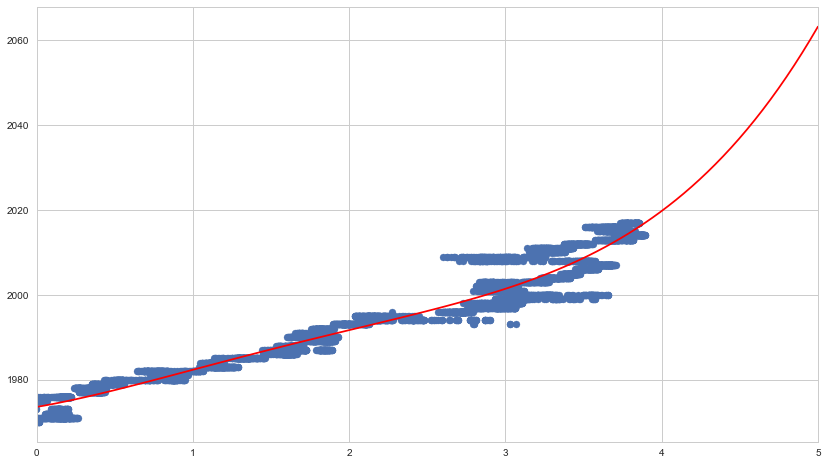

In [722]:
xp = np.linspace(0, 5, 100)
plt.figure(figsize=(14, 8))
axes = plt.axes()
axes.set_xlim([0,5])
plt.scatter(trainX, trainY)
plt.plot(xp, p4(xp), c='r')
plt.show()


Testing Data

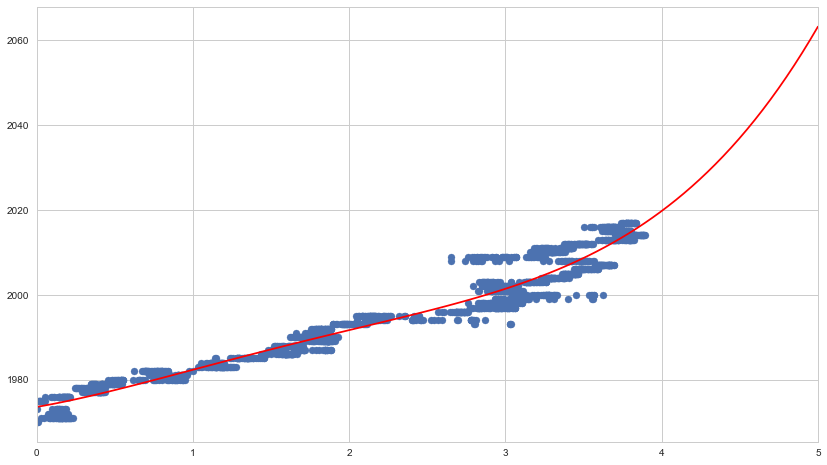

In [723]:
plt.figure(figsize=(14, 8))
axes = plt.axes()
axes.set_xlim([0,5])
plt.scatter(testX, testY)
plt.plot(xp, p4(xp), c='r')
plt.show()

R^2 Test

In [724]:
from sklearn.metrics import r2_score
r2 = r2_score(testY, p4(testX))
print(r2)

0.957661080115


R^2 Train

In [725]:
r2 = r2_score(np.array(trainY), p4(np.array(trainX)))
print(r2)

0.957031441004


Linear Regression

In [726]:
import sklearn
from sklearn.linear_model import LinearRegression

In [727]:
lreg = LinearRegression()

In [728]:
X[:10]

array([ 2.97166771,  3.67834283,  3.71519679,  3.05075911,  3.56192484,
        0.21791873,  1.81347843,  1.78777753,  1.8451593 ,  3.00246774])

In [729]:
Y[:10]

array([2001, 2013, 2013, 1997, 2006, 1976, 1992, 1989, 1987, 2008], dtype=int64)

In [778]:
X = np.array([[value,1] for value in X])

In [779]:
m, b = np.linalg.lstsq(X, Y)[0]

ValueError: setting an array element with a sequence.

In [762]:
m

10.154638598912586

In [763]:
b

1972.4930052566197

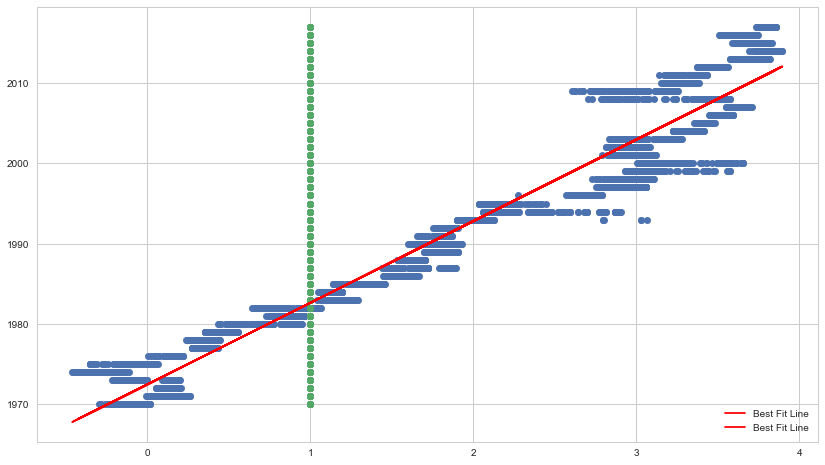

In [777]:
plt.figure(figsize=(14, 8))
plt.plot(X,Y,'o')
plt.plot(X, m*X + b,'r',label='Best Fit Line')
plt.legend(loc='lower right')

In [292]:

stock_data_yr=stock_data.loc[:,'Date':'BTU'].copy()
stock_data_yr['avg_all']=stock_data.mean()
stock_data_yr['year']=stock_data['Date'].dt.year
stock_data_yr.head()

,Date,ED,DD,CVX,FL,CAT,IP,SJW,F,LLY,...,ACG,MIME,TCRZ,MCX,EDIT,LMHA,UA,BTU,avg_all,year
0,1970-01-02,0.307997,0.000480,0.582503,1.857836,1.475225,1.808415,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970
1,1970-01-05,0.320831,0.000481,0.585290,1.839623,1.470783,1.873423,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970
2,1970-01-06,0.316553,0.000477,0.576929,1.845694,1.435234,1.855694,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970
3,1970-01-07,0.312275,0.000475,0.575535,1.809266,1.390800,1.814324,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970
4,1970-01-08,0.312275,0.000469,0.586683,1.821408,1.395244,1.832054,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970


In [619]:
stock_data.loc[:,'ED':'BTU'].head()


,ED,DD,CVX,FL,CAT,IP,SJW,F,LLY,AVP,...,EXTN,VYGR,ACG,MIME,TCRZ,MCX,EDIT,LMHA,UA,BTU
0,0.307997,0.000480,0.582503,1.857836,1.475225,1.808415,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.320831,0.000481,0.585290,1.839623,1.470783,1.873423,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.316553,0.000477,0.576929,1.845694,1.435234,1.855694,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.312275,0.000475,0.575535,1.809266,1.390800,1.814324,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.312275,0.000469,0.586683,1.821408,1.395244,1.832054,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Specific Stocks
===============

In [1]:
#Let's go ahead and start with some imports
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For Visualization
import matplotlib.pyplot as plt
%matplotlib inline

# For reading stock data from yahoo
#from pandas.io.data import DataReader
import pandas_datareader 
from pandas_datareader import data, wb
import pandas_datareader as pdr
# For time stamps
from datetime import datetime
from pandas_datareader.data import DataReader


# The tech stocks we'll use for this analysis
tech_list = ['AAPL','GOOG','MSFT','AMZN']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1,end.month,end.day)


#For loop for grabing yahoo finance data and setting as a dataframe

for stock in tech_list:   
    # Set DataFrame as the Stock Ticker
    globals()[stock] = DataReader(stock,'google',start,end)

In [2]:
AAPL.head()

,Open,High,Low,Close,Volume
Date,,,,,
2016-10-17,117.33,117.84,116.78,117.55,23624896
2016-10-18,118.18,118.21,117.45,117.47,24553478
2016-10-19,117.25,117.76,113.80,117.12,20034594
2016-10-20,116.86,117.38,116.33,117.06,24125801
2016-10-21,116.81,116.91,116.28,116.60,23192665


In [3]:
GOOG.head()

,Open,High,Low,Close,Volume
Date,,,,,
2016-10-17,779.80,785.85,777.50,779.96,1092973
2016-10-18,787.85,801.61,785.56,795.26,2056903
2016-10-19,798.86,804.63,797.64,801.56,1766798
2016-10-20,803.30,803.97,796.03,796.97,1757528
2016-10-21,795.00,799.50,794.00,799.37,1266181


In [4]:
MSFT.head()

,Open,High,Low,Close,Volume
Date,,,,,
2016-10-17,57.36,57.46,56.87,57.22,23830014
2016-10-18,57.53,57.94,57.41,57.66,19149538
2016-10-19,57.47,57.84,57.40,57.53,22878397
2016-10-20,57.50,57.52,56.66,57.25,49455612
2016-10-21,60.28,60.45,59.48,59.66,80032206


In [5]:
AMZN.head()

,Open,High,Low,Close,Volume
Date,,,,,
2016-10-17,821.50,822.00,811.68,812.95,3361492
2016-10-18,822.11,823.26,815.02,817.65,2512504
2016-10-19,820.40,820.67,815.17,817.69,2090706
2016-10-20,813.99,815.71,803.10,810.32,3151954
2016-10-21,809.36,819.42,809.00,818.99,2793015


Notes
====